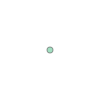

In [1]:
from shapely.geometry import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)

point

In [3]:
print(point)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [4]:
print(point.x)
print(point.y)

2.2
4.2


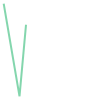

In [5]:
from shapely.geometry import Point, LineString

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([point1, point2, point3])
line_from_tuples = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line

In [6]:
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


In [7]:
length = line.length
centroid = line.centroid
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 52.46 units
Centroid: POINT (6.229961354035622 -11.892411157572392)


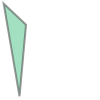

In [8]:
from shapely.geometry import Polygon

poly = Polygon([point1, point2, point3])
poly

In [9]:
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the hole
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

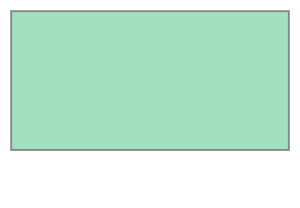

In [10]:
poly_without_hole = Polygon(shell=exterior)
poly_without_hole

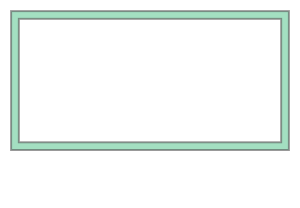

In [11]:
poly_with_hole = Polygon(shell=exterior, holes=hole)
poly_with_hole

In [12]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


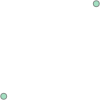

In [13]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

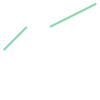

In [14]:
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

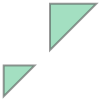

In [15]:
multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
multipoly

In [18]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.5 MB/s eta 0:00:00


In [19]:
import geopandas as gpd

In [26]:
from pathlib import Path
fp = "austin_pop_2019.gpkg"
print(fp)

austin_pop_2019.gpkg


In [27]:
data = gpd.read_file(fp)

In [28]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


<Axes: >

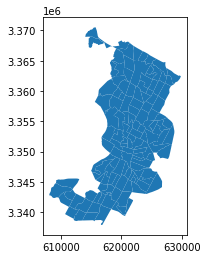

In [29]:
data.plot()

In [30]:
data["geometry"].head()


0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.330 3...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [31]:
data["geometry"].area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

In [32]:
data["area_km2"] = data.area / 1000000

In [33]:
data["area_km2"].head()

0    4.029772
1    1.532030
2    3.960344
3    2.181762
4    2.431208
Name: area_km2, dtype: float64

In [34]:
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [39]:
fp = "austin_pop_2019.gpkg"

# Read in the data and check the contents
data = gpd.read_file(fp)
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


In [41]:
import shapely
shapely.geometry.polygon.Polygon

shapely.geometry.polygon.Polygon

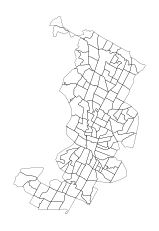

In [42]:
data.plot(facecolor="none", linewidth=0.2)

plt.axis("off")
plt.show()

In [43]:
data.crs.name

'WGS 84 / UTM zone 14N'

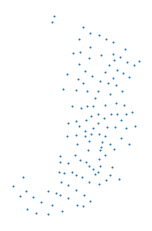

In [44]:
data.centroid.plot(markersize=1)

plt.axis("off")
plt.show()

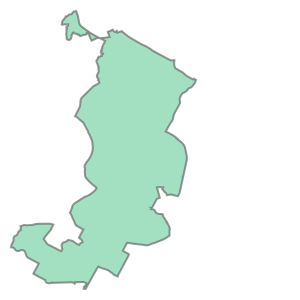

In [45]:
data.unary_union

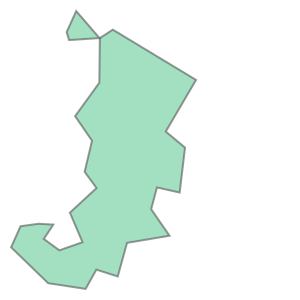

In [46]:
data.unary_union.simplify(tolerance=1000)

In [47]:
data.envelope.head()

0    POLYGON ((615643.487 3337909.895, 618358.033 3...
1    POLYGON ((618529.497 3358797.000, 620192.632 3...
2    POLYGON ((619198.456 3340875.421, 621733.880 3...
3    POLYGON ((621599.087 3350329.320, 623714.366 3...
4    POLYGON ((621630.247 3343015.679, 624133.189 3...
dtype: geometry

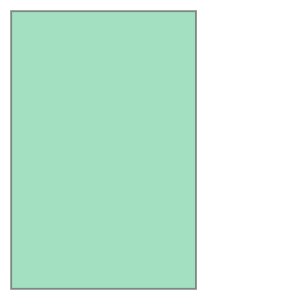

In [48]:
data.unary_union.envelope

In [49]:
data.convex_hull.head()

0    POLYGON ((616870.883 3337909.895, 616852.964 3...
1    POLYGON ((619496.705 3358797.000, 618962.703 3...
2    POLYGON ((619848.500 3340875.421, 619811.394 3...
3    POLYGON ((622145.426 3350329.320, 622132.429 3...
4    POLYGON ((623931.770 3343015.679, 622426.307 3...
dtype: geometry

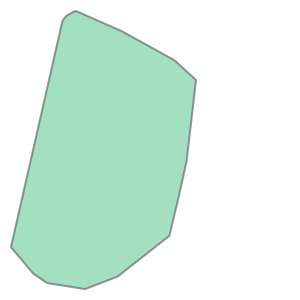

In [51]:
data.unary_union.convex_hull

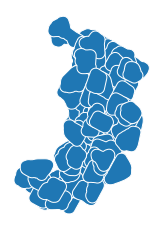

In [52]:
data.buffer(1000).plot(edgecolor="white")

plt.axis("off")
plt.show()


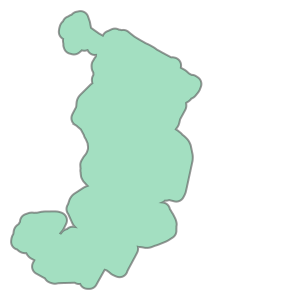

In [53]:
data.unary_union.buffer(1000)

In [56]:
import geopandas as gpd

# Read the file
fp = "eu_countries_2022.gpkg"
data = gpd.read_file(fp)

# What is the type?
print(type(data.crs))

# Check the coordinate reference system information
data.crs

<class 'pyproj.crs.crs.CRS'>


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
data["geometry"].head()

0    MULTIPOLYGON (((13.68400 46.43750, 13.51100 46...
1    MULTIPOLYGON (((6.31560 50.49700, 6.40500 50.3...
2    MULTIPOLYGON (((28.49800 43.43410, 28.06020 43...
3    MULTIPOLYGON (((16.94980 48.53580, 16.85110 48...
4    MULTIPOLYGON (((32.94170 34.64180, 32.55900 34...
Name: geometry, dtype: geometry

In [58]:
data_wgs84 = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
data["geometry"].head()

0    MULTIPOLYGON (((4604288.477 2598607.470, 45914...
1    MULTIPOLYGON (((4059689.242 3049361.180, 40650...
2    MULTIPOLYGON (((5805367.757 2442801.252, 57739...
3    MULTIPOLYGON (((4833567.363 2848881.974, 48272...
4    MULTIPOLYGON (((6413299.362 1602181.345, 63782...
Name: geometry, dtype: geometry

In [59]:
data.crs.to_epsg()

3035

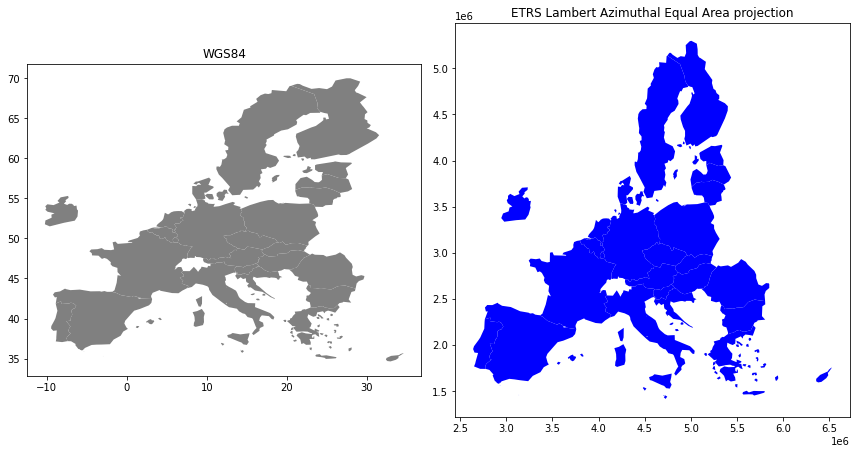

In [60]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor="gray")

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor="blue")

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

In [64]:
from shapely.geometry import Point

# Create GeoDataFrame with one point
gdf = gpd.GeoDataFrame({"geometry": Point(24.950899, 60.169158)}, index=[0])
print(gdf.crs)

None


In [68]:
from pyproj import CRS
gdf.crs = CRS.from_epsg(4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
gdf = gdf.set_crs(epsg=4326)
print(gdf.crs)

EPSG:4326


In [70]:
gdf = gpd.GeoDataFrame(
    {"geometry": Point(24.950899, 60.169158)}, index=[0], crs="EPSG:4326"
)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
crs_object = CRS.from_epsg(3035)
crs_object

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

In [73]:
crs_wkt = crs_object.to_wkt()
print(crs_wkt)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGL

In [74]:
epsg = CRS(crs_wkt).to_epsg()
print(epsg)

3035


In [61]:
fp = gpd.datasets.get_path("naturalearth_lowres")
admin = gpd.read_file(fp)
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

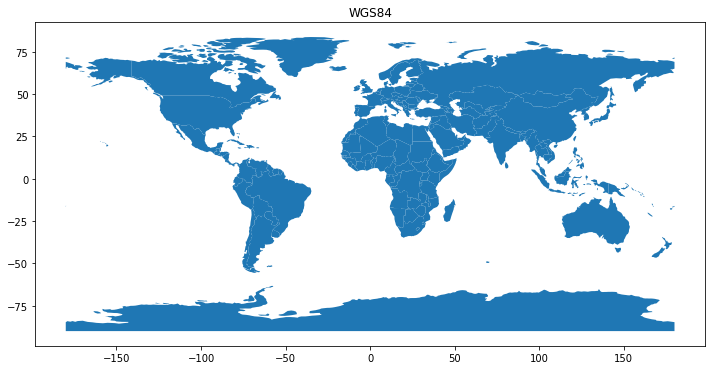

In [62]:
admin.plot(figsize=(12, 6))
plt.title("WGS84");

In [80]:
admin.to_crs(epsg=3857)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((20037508.343 -1812498.413, 200..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((3774143.866 -105758.362, 3792946.708..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-964649.018 3205725.605, -964597.245..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((2096126.508 5765757.958, 2096127.988..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((2234260.104 5249565.284, 2204305.520..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((2292095.761 5139344.949, 2284604.344..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-6866186.192 1204901.071, -6802177.4..."


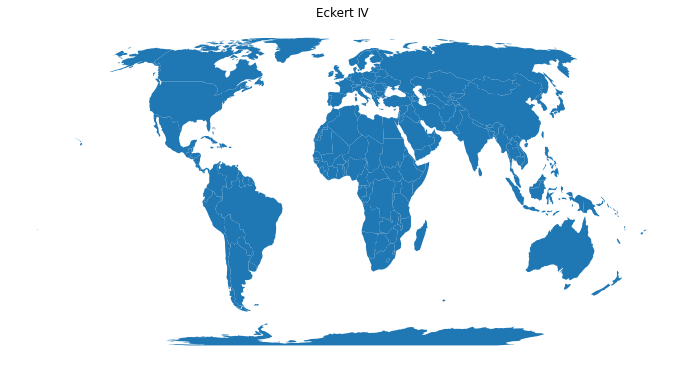

In [81]:
ax = admin.to_crs(crs="ESRI:54012").plot(figsize=(12, 12))
plt.title("Eckert Ⅳ")
plt.axis("off");

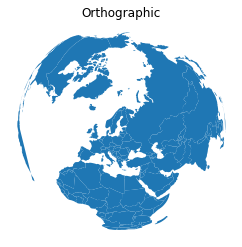

In [82]:
proj_string = "+proj=ortho +lat_0=60.00 +lon_0=23.0000"
ortho = CRS.from_proj4(proj_string)
admin.to_crs(ortho).plot()
plt.axis("off")
plt.title("Orthographic");